In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import Ridge

In [2]:
data=load_diabetes()

In [3]:
data.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [4]:
X=data.data
y=data.target

In [5]:
y=y.reshape(-1,1)

X.shape

(442, 10)

In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [7]:
# Détermination du degré optimal du polynôme en utilisant le critère BIC
from sklearn.preprocessing import PolynomialFeatures


max_degree = 11
bic_values = []
models = []

for degree in range(1, max_degree + 1):
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train)
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    num_params = X_train_poly.shape[1]
    y_train_pred = model.predict(X_train_poly)
    log_likelihood = -0.5 * len(X_train) * np.log(mean_squared_error(y_train, y_train_pred))
    bic = -2 * log_likelihood + num_params * np.log(len(X_train))
    bic_values.append(bic)
    models.append(model)

best_model_idx = np.argmin(bic_values)
best_model = models[best_model_idx]
best_degree = best_model_idx + 1

print(f"Best polynomial degree: {best_degree}")

Best polynomial degree: 4


In [8]:
L=LinearRegression()

In [9]:
L.fit(X_train,y_train)

LinearRegression()

In [10]:
y_pred=L.predict(X_test)

In [11]:
print("R2 score",r2_score(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score 0.4526027629719197
RMSE 53.853445836765914


In [12]:
R=Ridge(alpha=0.001)

In [13]:
R.fit(X_train,y_train)

Ridge(alpha=0.001)

In [14]:
y_pred1=R.predict(X_test)

In [15]:
print("R2 score",r2_score(y_test,y_pred1))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred1)))

R2 score 0.4534280301019331
RMSE 53.81283525336317


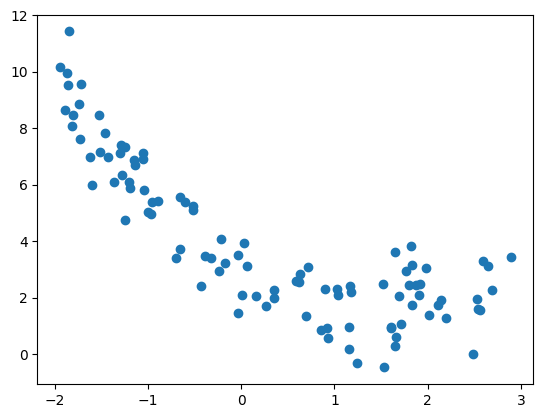

In [16]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)
plt.scatter(x1, x2)
plt.show()

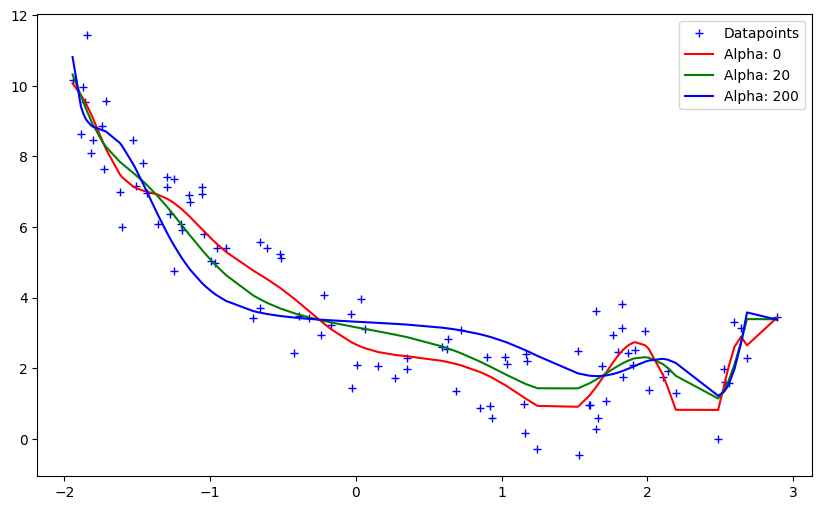

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 20, 200]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()